Exercise 3
==========

##### Bakhtiyar Garashov

This lesson we will practice how to do data classification and
aggregation in Geopandas for vector and raster data

-   Don't forget to check out the hints for this lesson's exercise at the end of this notebook if you're having trouble.
-   Scores on this exercise are out of **10 points**.

Sections
--------

- Problem 1: Create a map of a phenomenon from raster data and classify with zonal statistics (5 points)
- Problem 2: Join accessibility datasets into a grid and visualize them by using a classifier (5 points)

At first download the datasets from Moodle: assignment3_data.zip

### Problem 1: Create a map of a phenomenon from raster data and classify with zonal statistics (5 points)

1.  read in data
    -   read in the European countries shapefile `europe_lowres.shp`
    -   read in the raster of precipitation data
        `gpcc_precip_2018_11.tif` (gridded monthly totals of rainfall in
        November 2018 in mm), Meyer-Christoffer, Anja; Becker, Andreas;
        Finger, Peter; Schneider, Udo; Ziese, Markus (2018): GPCC
        Climatology Version 2018 at 0.25°: Monthly Land-Surface
        Precipitation Climatology for Every Month and the Total Year
        from Rain-Gauges built on GTS-based and Historical Data. [DOI:
        10.5676/DWD_GPCC/CLIM_M\_V2018_025](https://opendata.dwd.de/climate_environment/GPCC/html/gpcc_normals_v2018_doi_download.html)
2.  basic plot
    -   check coordinate systems (CRS) of both datasets and transform
        into the same if necessary
    -   Create a map by plotting the raster with a suitable colormap
        (<https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html>)
        and the polygons on top, so that we can still see the raster
        pixels (no filling for the polygons)
3.  zonal raster statictics
    -   summarise the absolute amount of rainfall per country with zonal
        mean, sum and range statistic `zonal_stats` -\>
        `mean, sum, range` and these to the countries geodataframe.
        `sum` summarises, aka adds up, all numbers of grid cells/pixels
        under each polygon. `range` calculates the difference between
        the minimum and maximum of grid cell/pixel value under each
        polygon and provides
    -   rename the columns into `mean_rainfall`, `sum_rainfall` and
        `delta_rainfall`
    -   visualize each of these statistics in a plot as map and basic
        histogram to understand the spatial distribution and value
        frequencies to better understand the data, use titles on the
        plots to make sure we know which variable is plotted
4.  Classify

    -   reproject your europe countries dataframe with the statistics
        columns included in the projected coordinate system EPSG:3035
        ([ETRS89 / LAEA Europe](https://epsg.io/3035))
    -   calculate the area in square kilometers for each country (into a
        column `area_km2` )
    -   calculate the average rainfall (into a `average_precip_km2` column),
        which is `sum_rainfall / area_km2`
    -   now classify `average_precip_km2` column and plot again, with at
        least one of `NaturalBreaks` , `EqualInterval`, `Quantiles`, OR
        `StdMean`

5.  Answer questions and submit all results

    -   compare `average_precip_km2` with `mean_rainfall`, what do you
        observe?
    -   Which country has had the highest variability in rainfall in that
        month?
    -   submit code and figures, as usual as Jupyter notebook and the maps
        you have visualized (as png).

In [59]:
# 1.  read in data
# import necessary libraries

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import os

euro_lowres='europe_lowres.shp'

euro_countries=gpd.read_file(euro_lowres)

precip_dataset = rasterio.open('gpcc_precip_2018_11.tif')



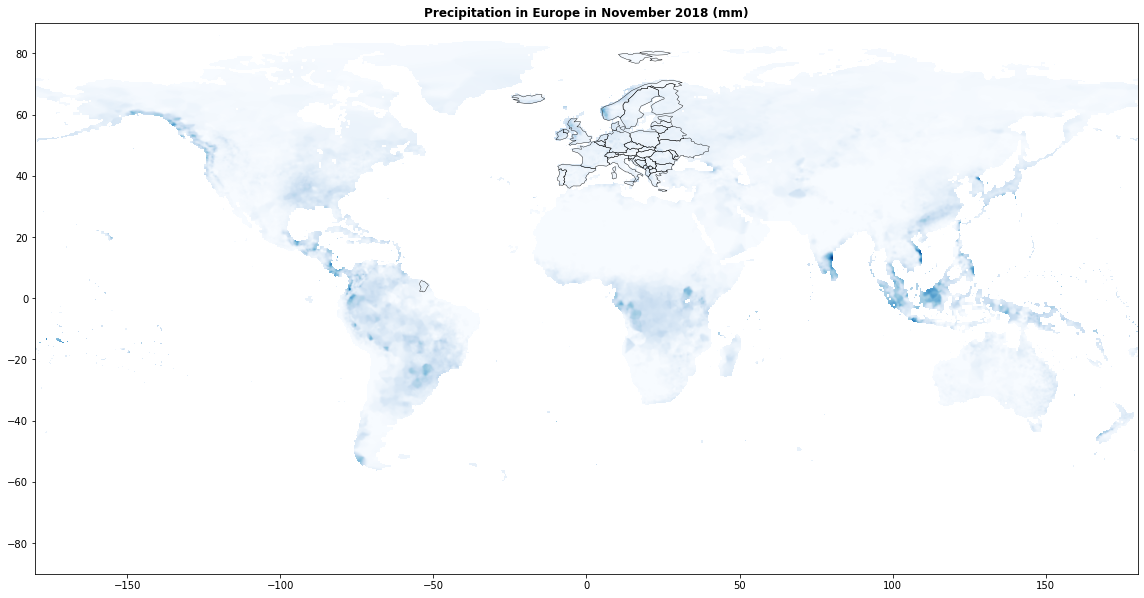

In [62]:
# 2.  basic plot
fig, ax = plt.subplots(figsize=(16, 16))

euro_countries.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.4)
show(precip_dataset,cmap='Blues',title='Precipitation in Europe in November 2018 (mm)',ax=ax)
plt.tight_layout()

plt.savefig('precip_map.png')

In [3]:
# 3.  zonal raster statictics

In [4]:
# 4.  Classify

5.  Answer questions and submit all results

-   compare `average_precip_km2` with `mean_rainfall`, what do you
    observe?
-   Which country has had the highest variability in rainfall in that
    month?
-   submit code and figures, as usual as Jupyter notebook and the maps
    you have visualized (as png).

### Problem 2: Join accessibility datasets into a grid and visualize them by using a classifier (5 points)

The overall aim this task is to understand the *dominance area* \[0\]
for **one** of the shopping centers in Helsinki with different travel
modes (Public transport, private car).

The *dominance area* is the geographical area from where the given
service (shopping center) is the closest one to reach in terms of travel
time.

**Steps:**

-   The assignment datasets include 7 text files containing data
    about accessibility in Helsinki Region and a Shapefile that contains
    a Polygon grid that can be used to visualize and analyze the data
    spatially. The datasets are:

    > -   `travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt` including
    >     travel times and road network distances to specific shopping
    >     center
    > -   `MetropAccess_YKR_grid_EurefFIN.shp` including the Polygon
    >     grid with \'YKR_ID\' column that can be used to join the grid
    >     with the accessibility data

-   Read the travel_time data file for one of the shopping centres with
    Pandas and select only following columns from them:

    > -   pt_r\_tt: travel mode Public tranport
    > -   car_r\_t: travel mode private car
    > -   from_id: travel start from (refering to a YKR_ID grid
    >     \"coordinate\")
    > -   to_id: travel destination (the YKR_ID frid coordinate of the
    >     shopping centre), that\'s why it is staying the same per
    >     shopping centre file

-   load the MetropAccess shapefile with geopandas

-   join/merge the shopping centre dataframe with the Metro grid
    dataframe based on the ID / YKR_ID column

-   create a classifier (custom or common one) based on the materials
    that we went through in the [lesson materials](https://kodu.ut.ee/~kmoch/geopython2020/L4/reclassify.html#classifying-data)

-   You need to classify the data into a new column in your
    GeoDataFrame. For classification, you can **either**:

    > -   Use the [common classifiers from pysal](https://kodu.ut.ee/~kmoch/geopython2020/L4/reclassify.html#classification-based-on-common-classification-schemes)
    > -   **OR** create your own custom classifiers. If you create your own, remember to
    >     document it well how it works! Write a general description of
    >     it and comment your code as well.

-   Visualize the **classified** travel times (Public transport AND Car)
    of the shopping centre with appropriate plots.

-   submit code and figures, as usual as Jupyter notebook and the maps
    you have visualized (as png).

### Optional task for advanced students (additional max 3 points)

Clip the precipitation raster file (while still in EPSG:4326) for
European countries and then reproject (into EPSG:3035) and plot it with
the Europe countries shapefile (in EPSG:3035). Make it look good.

Assignment 3 hints
================

for Problem 1
-------------

-   when renaming columns, either do it *inplace*, meaning changing the
    dataframe immediately, or assign the dataframe with the changed
    column names to a variable:

``` {.}
# compare and see in the raster lecture
demstats_df.rename(columns={'mean':'dem_mean','std':'dem_std'}, inplace=True)
# or reassign, without using the 'inplace' keyword
demstats = demstats_df.rename(columns={'mean':'dem_mean','std':'dem_std'})
```

-   plotting the scale while ignoring the nodata values can be achieved
    with the vmin and vmax keywords for the plot functions. Check the
    histogram which values to consider for vmin and vmax.
-   you can very easily plot a histogram from Pandas or Geopandas
    dataframe in th esame way, how to plot graphs or maps:

``` {.}
fig, (ax_map, ax_hist) = plt.subplots(1, 2, figsize=(13,8))
geo_df.plot(ax=ax_map, column="col_a", cmap="viridis", legend=True)
geo_df.hist(ax=ax_hist, column="col_a")
plt.title("a title for col_a")
plt.show()
```

-   see [Pandas documentation on
    historgram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

for Problem 2
-------------

-   Documentation of the Travel Time Matrix dataset and explanation for
    different column names can be found at the Accessibility Research
    Group website: [Helsinki Region Travel Time Matrix
    2015](http://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix-2015)
-   Note that the input travel time data is stored in text files when
    reading in the data.
-   Keep columns
    [\'from_id\']{.title-ref},\`\'to_id\'[,]{.title-ref}\'pt_r\_tt\'[
    and ]{.title-ref}\'car_r\_t\'\` in the travel time data files
-   Join the data using columns [\'from_id\']{.title-ref} from the
    travel time data, and [\'YKR_ID\']{.title-ref} in the grid-shapefile
-   See hints for joining the travel time data to the grid shapefile
    from our earlier materials from the lesson regarding classifying the
    bogs via the landuse legend file.
-   Plotting the data might take a while (be patient!)
